<a href="https://colab.research.google.com/github/joaovvrodrigues/data-analysis/blob/main/djonga_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados sobre as letras das músicas do Djonga**

Importando algumas bibliotecas básicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.style.use('ggplot')

Importando bibliotecas de processamento de texto

In [2]:
import nltk    
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from string import punctuation
from nltk import FreqDist
import re

nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')
nltk.download('mac_morpho')
nltk.download('machado')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopwords = set(stopwords.words('portuguese') + list(punctuation))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Importando biblioteca do Genius

In [7]:
!pip install lyricsgenius
import lyricsgenius

**Caso já tenha o JSON pode pular os 2 próximos blocos de código**

Pegando as informações de todas músicas do Emicida

In [ ]:
genius = lyricsgenius.Genius("5AqED1kjf7MTLHRbiH7vYKlWNaZJDQklQ-6e1DG6qZd7p3-GtShXMpEoYu6aDwo3", skip_non_songs=True, excluded_terms=["(Live)", "(Ao Vivo)"], remove_section_headers=True,  verbose = True)
artist = genius.search_artist('Djonga',  sort='popularity',  include_features=True )

Salvando informações em JSON

In [9]:
artist.save_lyrics()

Wrote `Lyrics_Djonga.json`


Lendo JSON do artista

In [3]:
with open('Lyrics_Djonga.json') as json_data:
    data = json.load(json_data)

**Função de processamento de texto**

In [4]:
def tokenizer():
  letras = []
  letras_token = []

  for i in range(len(data['songs'])):
    letra = data['songs'][i]['lyrics']

    re.sub(r'[-./?!,":;()\`]',' ',letra)
    re.sub('[-|0-9]',' ', letra)

    palavras = word_tokenize(letra.lower(), language='portuguese')
    letras_token.append(palavras)
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords and len(palavra) > 3]

    letras.extend(palavras_sem_stopwords)

  return letras, letras_token

**Função de análise de frequência de palavras**

In [5]:
def frequencia(letras, quantidade):
  frequencia = FreqDist(letras)

  mais_frequentes = frequencia.most_common(quantidade)
  mais_frequentes_quantidade = []
  for index, item in enumerate(mais_frequentes):
      mais_frequentes_quantidade.append(mais_frequentes[index][1])

  return mais_frequentes, mais_frequentes_quantidade

**Função retorna gráfico de frequência**

In [6]:
def grafico_freq(mais_frequentes, mais_frequentes_quantidade, ylabel, title):  
  
  plt.rcParams['axes.facecolor'] = '#f5f0f0'
  
  palavras = mais_frequentes
  y_pos = np.arange(len(palavras))
  contagem = mais_frequentes_quantidade

  plt.figure(figsize=(15,10))
  plt.bar(y_pos, contagem, align='center', alpha=0.8)
  plt.xticks(y_pos, palavras, rotation = 90, alpha = 1, fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel, fontsize=16)
  plt.title(title)
  plt.show()

Análisando as letras e retornando os 20 termos mais utilizados

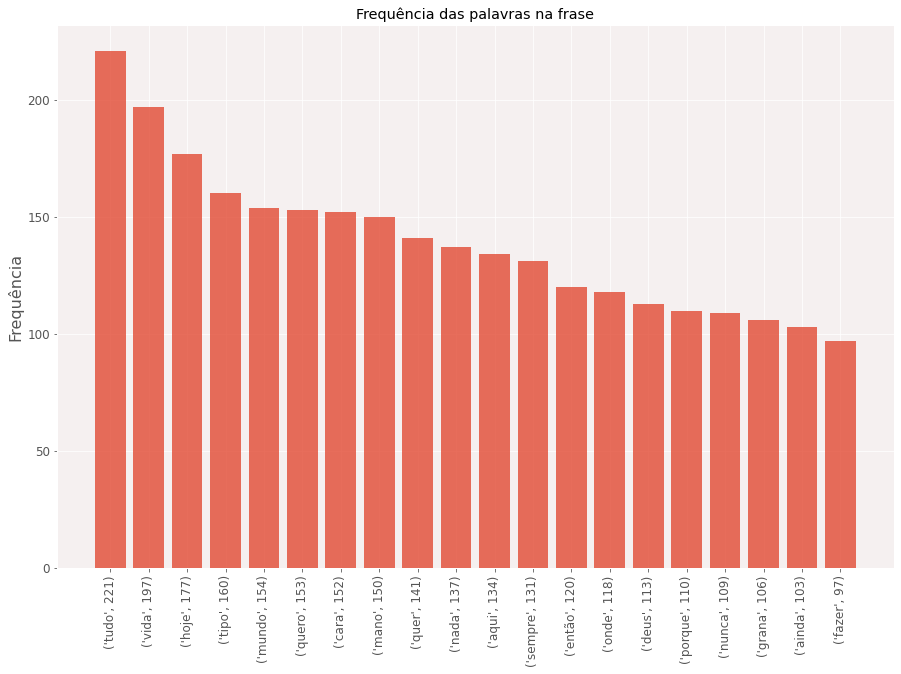

In [7]:
letras, letras_token = tokenizer()
mais_frequentes, mais_frequentes_quantidade = frequencia(letras, 20)

grafico_freq(mais_frequentes, mais_frequentes_quantidade, 'Frequência', 'Frequência das palavras na frase')

20 musicas com maior quantidade de palavras

<BarContainer object of 20 artists>

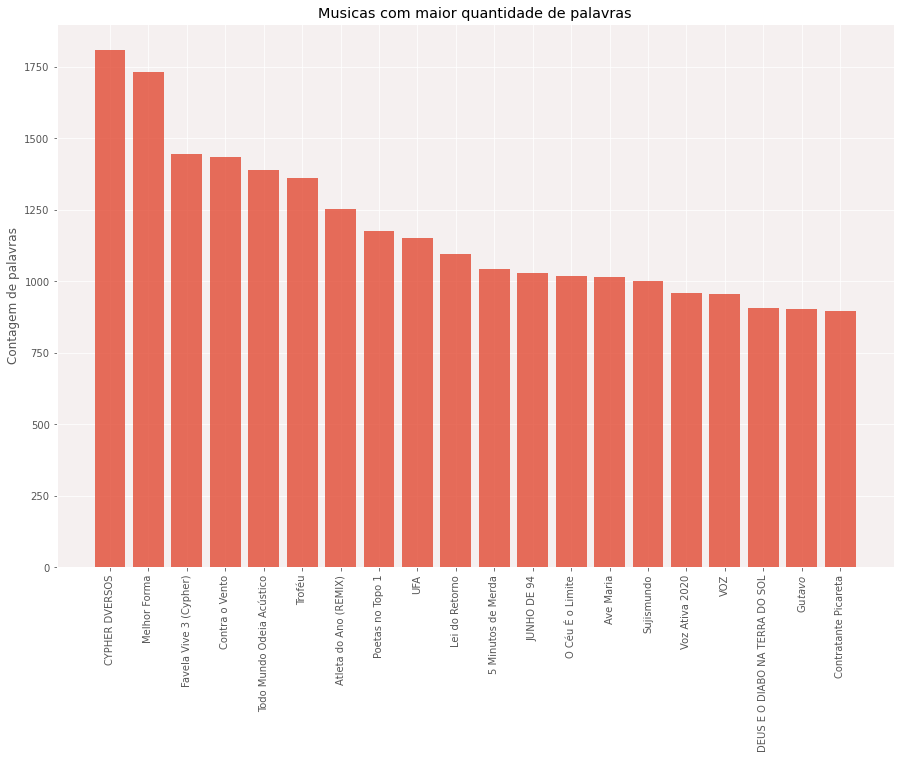

In [8]:
letras, letras_token = tokenizer()
quantidadePalavras = []

for index, item in enumerate(data['songs']):
      quantidadePalavras.append([data['songs'][index]['title'] , len(letras_token[index])])

df = pd.DataFrame(quantidadePalavras ,columns=['Musica', 'Quantidade palavras'])
df = df.sort_values(by=['Quantidade palavras'], ascending=False).head(20)


plt.figure(figsize=(15,10))
plt.xticks(rotation = 90, alpha = 1)
plt.ylabel('Contagem de palavras')
plt.title('Musicas com maior quantidade de palavras')
plt.bar(df['Musica'], df['Quantidade palavras'],align='center', alpha=0.8, )


**WordCloud dos termos mais utilizados**

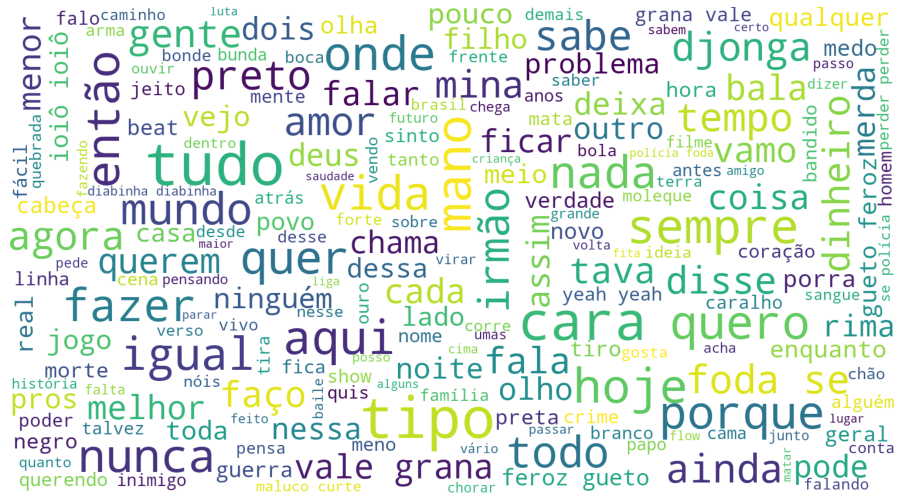

In [9]:
from wordcloud import WordCloud

separator = ' '
palavras = [separator.join(letras)]

wordcloud = WordCloud(max_font_size=100, width = 1520, height = 835, background_color="white").generate(str(palavras)[1:-1])
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

20 artistas que mais tiveram feats com Djonga

> Para funcionar deverá marcar include_features=True



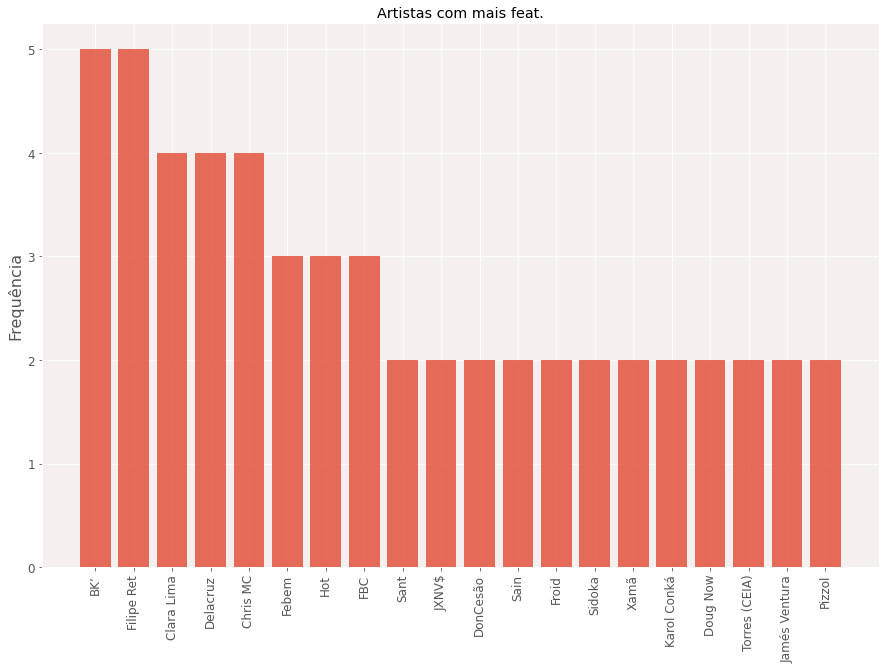

In [10]:
artistas = []
for index, item in enumerate(data['songs']):
  for index, item in enumerate(data['songs'][index]['featured_artists']):
      artistas.append(item['name'])

artistas[:] = [x for x in artistas if x != 'Djonga']
mais_frequentes, mais_frequentes_quantidade = frequencia(artistas, 20)

artistas.clear()
for item in mais_frequentes:
  artistas.append(item[0])

grafico_freq(artistas, mais_frequentes_quantidade, 'Frequência', 'Artistas com mais feat.')

Quantidade de músicas lançadas por ano

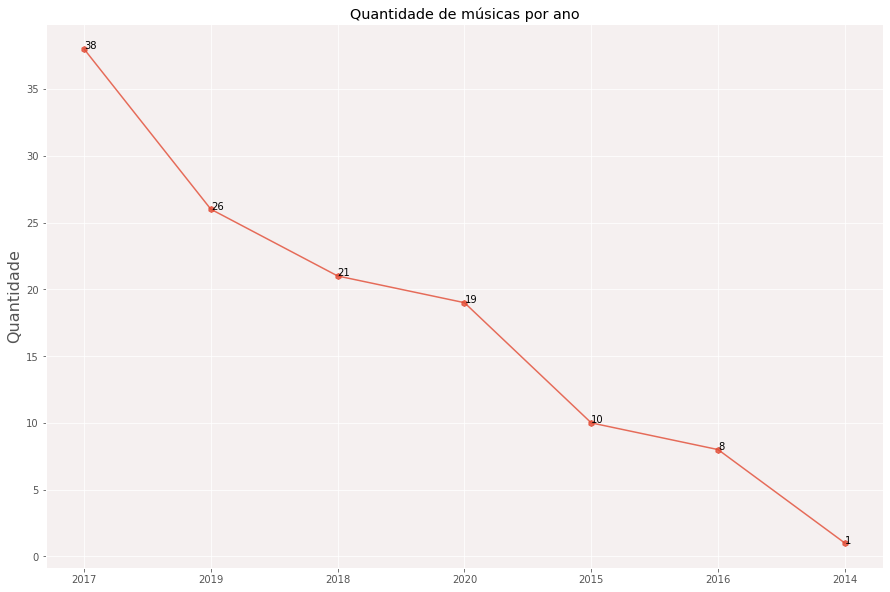

In [16]:
anos = []
mais_frequentes = []
mais_frequentes_quantidade = []
palavras = []

for index, item in enumerate(data['songs']):
  if(item['release_date'] != None):
    anos.append(item['release_date'][0:4])

mais_frequentes, mais_frequentes_quantidade = frequencia(anos, 40)

for item in mais_frequentes:
  palavras.append(item[0])

    
plt.figure(figsize=(15,10))
plt.plot(palavras, mais_frequentes_quantidade, alpha=0.8, marker = "h")

for a,b in zip(palavras, mais_frequentes_quantidade): 
    plt.text(a, b, str(b))

plt.ylabel('Quantidade', fontsize=16)
plt.title('Quantidade de músicas por ano')
plt.show()